# Linear regression test with age and days to recovery data.

In [7]:
# Import Relevant libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

df = pd.read_csv("zombie-health-age-days-recovery.csv")
df.head()


,name,age,days_recovery
0,Rot Donnadd,43,9
1,Pid Mught,38,7
2,Thulk Lebbimp,63,10
3,Bouvossam Damme,71,13
4,Pirg Zall,48,7


In [8]:
df.drop(["name"], axis=1, inplace=True)
df.columns = ["x", "y"]
df.head()

,x,y
0,43,9
1,38,7
2,63,10
3,71,13
4,48,7


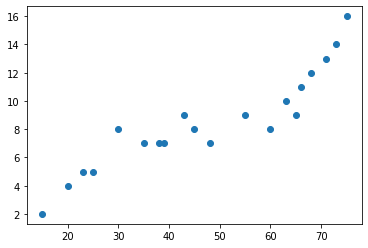

In [9]:

# Learning rate
learning_rate = 0.0001

# Number of loops for training through all your data to update the parameters
training_epochs = 10

# the training dataset
x_train = df["x"]
y_train = df["y"]

# plot of data
plt.scatter(x_train, y_train)

In [13]:
# declare weights
weight = tf.Variable(0.)
bias = tf.Variable(0.)

# Define linear regression expression y
def linreg(x):
    y = weight*x + bias
    return y

# Define loss function (MSE)
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# train model
for epoch in range(training_epochs):
    # Compute loss within Gradient Tape context
    with tf.GradientTape() as tape:
        y_predicted = linreg(x_train)
        loss = squared_error(y_predicted, y_train)
        # Get gradients
        # print(loss)
        # print(weight)
        # print(bias)
        gradients = tape.gradient(loss, [weight,bias])
        # Adjust weights
        # print(gradients)
        weight.assign_sub(gradients[0]*learning_rate)
        bias.assign_sub(gradients[1]*learning_rate)
        # Print output
        print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")


tf.Tensor(84.35, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
[<tf.Tensor: shape=(), dtype=float32, numpy=-933.4>, <tf.Tensor: shape=(), dtype=float32, numpy=-17.1>]
Epoch count 0: Loss value: 84.3499984741211
tf.Tensor(20.230959, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09334>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.00171>
[<tf.Tensor: shape=(), dtype=float32, numpy=-440.01843>, <tf.Tensor: shape=(), dtype=float32, numpy=-8.163942>]
Epoch count 1: Loss value: 20.230958938598633
tf.Tensor(5.9815483, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.13734184>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.002526394>
[<tf.Tensor: shape=(), dtype=float32, numpy=-207.4302>, <tf.Tensor: shape=(), dtype=float32, numpy=-3.951333>]
Epoch count 2: Loss value: 5.981548309326172
tf.Tensor(2.814

0.17648664
0.003390875


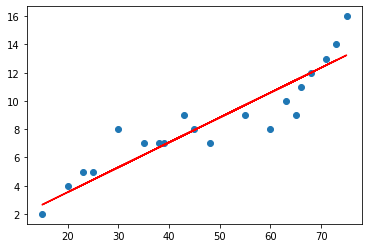

In [11]:
print(weight.numpy())
print(bias.numpy())
plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()